# Data Science Assessment

* Name: Deon Jude Schellito
* M.Sc. Data Science
* Institution: Loyola College
* Email ID: deonschellito619@gmail.com


The data given is Hepatitis Disease

Hepatitis refers to an inflammatory condition of the liver. It's commonly caused by a viral infection, but there are other possible causes of hepatitis. These include autoimmune hepatitis and hepatitis that occurs as a secondary result of medications, drugs, toxins, and alcohol.(From Google)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('hepatitis_csv.csv')
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


The data consists of 155 rows and 20 columns

In [3]:
data.shape

(155, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [5]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

There are alot of missing values, we can drop the missing values of all the columns(row wise) except the Protime column since it consists of more than 40% percentage of the data

<AxesSubplot:ylabel='Frequency'>

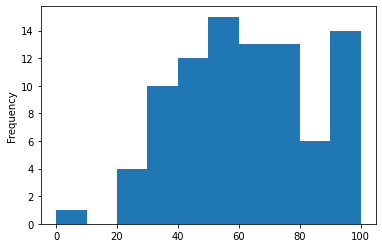

In [6]:
data['protime'].plot(kind='hist')

Replacing it with the mean value since our main aim is EDA, and from the histogram we can it it is close to normal distribution except having more values at 100

In [7]:
data['protime'].fillna(data['protime'].mean(),inplace=True)

In [8]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime             0
histology           0
class               0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(112, 20)

After removing the missing values we have 112 rows and 20 columns. 

# Imputation,Outiler removal,Encoding the varaibles is not done, since our assessment is only about Exploratory Data Analysis (EDA) 

## Exploratory Data Analysis (EDA) 

In [11]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

Most of the columns are categorical, either True or False and Live or die 

In [12]:
data['class'].value_counts()

live    93
die     19
Name: class, dtype: int64

<BarContainer object of 2 artists>

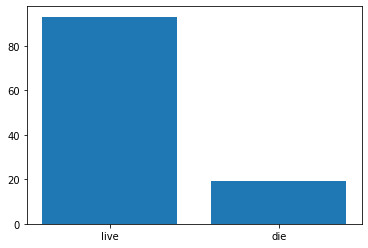

In [13]:
plt.bar(data['class'].value_counts().index,data['class'].value_counts().values)

<AxesSubplot:xlabel='sex'>

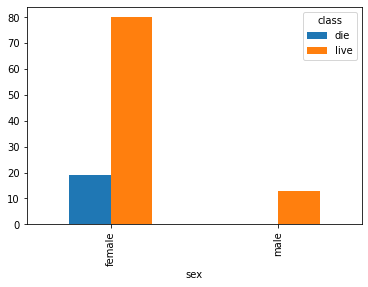

In [14]:
pd.crosstab(data['sex'],data['class']).plot(kind='bar')

From the above bar chart,
* The data was biased, the records consist mostly of female records
* There is no records of death for male Gender


### From the data, the class attribute which is our target column has only 93 Live people and 19 People Dead.It is an imbalanced dataset

<AxesSubplot:xlabel='age', ylabel='Count'>

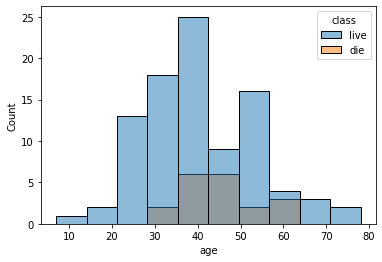

In [15]:
sns.histplot(data=data,x='age',hue='class')

### From the age column compairing it with the class, we can see that persons between the age of 30 to 60 are dead,
### One of the reasons maybe because the data is biased we have only few data of Dead people or Must be due to some factors

In [16]:
steroid_class=pd.crosstab(data['steroid'],data['class'])
steroid_class


class,die,live
steroid,,
False,10,44
True,9,49


<AxesSubplot:xlabel='steroid'>

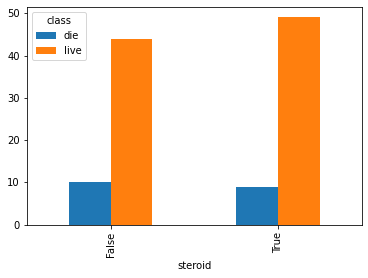

In [17]:
steroid_class.plot(kind='bar')

### Sterioids is used as a cure for Hepatitis Disease From the above it clear there is almost a equal peobabilty between persons who were on steroids or not having steriods, having  equal chances of death or life.

In [18]:
liverbig_class=pd.crosstab(data['liver_big'],data['class'])
liverbig_class

class,die,live
liver_big,,
False,2,20
True,17,73


<AxesSubplot:xlabel='liver_big'>

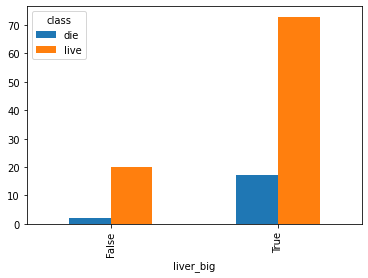

In [19]:
liverbig_class.plot(kind='bar')

### From the above table, we can see that when the liver is big there are more people who died.

In [20]:
liverfirm_class=pd.crosstab(data['liver_firm'],data['class'])
liverfirm_class

class,die,live
liver_firm,,
False,7,51
True,12,42


<AxesSubplot:xlabel='liver_firm'>

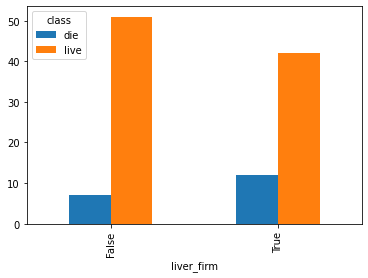

In [21]:
liverfirm_class.plot(kind='bar')

### From the above table, we can see that, depending on the firmness of the liver (ie when it is True), there are more people who died.

## The firmness and Size of a liver plays a major role in identifying Hepatitis in a person. 

### From the above analysis of Liver Big and Liver Firm, we can see that when either one of them is false there are fewer dead people.

In [22]:
liver_big_firm=data.groupby([data['liver_big'],data['liver_firm'],data['class']])
print('Liver Big True and Liver Firm True',liver_big_firm['class'].get_group((True,True,'die')).count())
print('Liver Big True and Liver Firm False',liver_big_firm['class'].get_group((True,False,'die')).count())
print('Liver Big False and Liver Firm True',liver_big_firm['class'].get_group((False,True,'die')).count())

Liver Big True and Liver Firm True 10
Liver Big True and Liver Firm False 7
Liver Big False and Liver Firm True 2


In [23]:
print('Liver Big True and Liver Firm True',liver_big_firm['class'].get_group((True,True,'live')).count())
print('Liver Big True and Liver Firm False',liver_big_firm['class'].get_group((True,False,'live')).count())
print('Liver Big False and Liver Firm False',liver_big_firm['class'].get_group((False,False,'live')).count())
print('Liver Big False and Liver Firm True',liver_big_firm['class'].get_group((False,True,'live')).count())

Liver Big True and Liver Firm True 24
Liver Big True and Liver Firm False 49
Liver Big False and Liver Firm False 2
Liver Big False and Liver Firm True 18


### We can see that when Both the liver firm and liver size is False , we  can see that there are no persons dead
### Based on this we may say that if both are false there is chance of living (But still we cannot make a strong conclusion, since only 19 records are present

### In Hepatitis B,Patients enter the next phase which  is characterized by anorexia, malaise, and fatigue.

In [24]:
an_mal_fa=data.groupby([data['anorexia'],data['malaise'],data['fatigue'],data['class']])

In [25]:
data.groupby([data['anorexia'],data['malaise'],data['fatigue'],data['class']])['class'].count()

anorexia  malaise  fatigue  class
False     False    False    die       2
                            live     37
                   True     die       5
                            live     26
          True     True     die       9
                            live     14
True      True     True     die       3
                            live     16
Name: class, dtype: int64

### out of 112 Patients, 37 are alive when having all these three symptoms false(anorexia,malaise,fatigue)

Bilirubin can build up in the blood and cause jaundice in the presence of certain kinds of liver damage (particularly from drinking too much alcohol or from viral hepatitis) (From Google)
Once the bilirubin has left the liver, levels may be high because the bilirubin is unable to leave the body

<AxesSubplot:xlabel='bilirubin', ylabel='Count'>

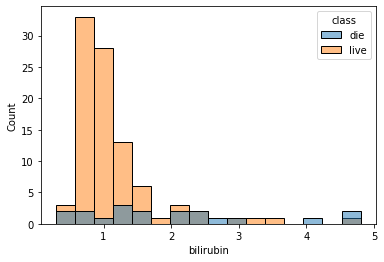

In [26]:
sns.histplot(data=data,x='bilirubin',hue='class',hue_order=['die','live'])

In [27]:
data['bilirubin'].describe()

count    112.000000
mean       1.272321
std        0.886252
min        0.300000
25%        0.700000
50%        1.000000
75%        1.400000
max        4.800000
Name: bilirubin, dtype: float64

# From the above Stats table and chart, we can see that  bilirubin levels fall somewhere between 0.3 and 1.2


In [28]:
data[data['bilirubin']>1.2].shape

(35, 20)

### There are 35 Patient having Bilirubin levels more than the mean value (ie 1.2)

<AxesSubplot:xlabel='bilirubin', ylabel='Count'>

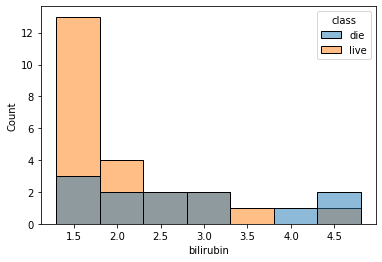

In [29]:
sns.histplot(data=data[data['bilirubin']>1.2],x='bilirubin',hue='class',hue_order=['die','live'])


### we can see that, Bilirubin level 1.8 and above consists of people who are dead and alive,But the survival chances are less.
### People with Bilirubin level between 0.3 and 1.2 have more chances of Survival

Few Columns have been analyzed and insights are taken.